Using data from https://www.kaggle.com/c/digit-recognizer/data, the goal of this notebook is to use classifination tool, specifically KNN, to train and predict digits. All the modules used are as shown below, the main ones used are numpy, pandas and sklearn

In [1]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn import neighbors, metrics, grid_search, cross_validation
import matplotlib.pyplot as plt
##import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import feature_selection, linear_model
import sklearn

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

In [2]:
# reading in data from csv file
df = pd.read_csv(os.path.join('~/', 'downloads', 'train_digit.csv'))
df

,label,pixel0,pixel1,pixel2,pixel3,...,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,...,0,0,0,0,0
1,0,0,0,0,0,...,0,0,0,0,0
2,1,0,0,0,0,...,0,0,0,0,0
3,4,0,0,0,0,...,0,0,0,0,0
4,0,0,0,0,0,...,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,...,0,0,0,0,0
41996,1,0,0,0,0,...,0,0,0,0,0
41997,7,0,0,0,0,...,0,0,0,0,0
41998,6,0,0,0,0,...,0,0,0,0,0


- Using only the first 10000 images as an initial analysis to get a general idea of the data set as well as saving time.
- Since the image is given in 28 x 28 pixels, it needed to be reshaped into a "matrix" in order to output the data into an image

In [3]:
#select the first 5000 rows of data, and split label and pixels into two different DataFrames
images = df.iloc[0:5000,1:]
labels = df.iloc[0:5000,:1]
images

,pixel0,pixel1,pixel2,pixel3,pixel4,...,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,...,0,0,0,0,0
1,0,0,0,0,0,...,0,0,0,0,0
2,0,0,0,0,0,...,0,0,0,0,0
3,0,0,0,0,0,...,0,0,0,0,0
4,0,0,0,0,0,...,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,...,0,0,0,0,0
4996,0,0,0,0,0,...,0,0,0,0,0
4997,0,0,0,0,0,...,0,0,0,0,0
4998,0,0,0,0,0,...,0,0,0,0,0


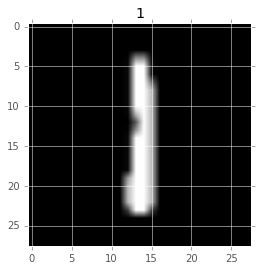

In [4]:
#reshaping and plotting pixels into "matrix" form

i=2
img=images.iloc[i].as_matrix()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(labels.iloc[i,0])

(array([ 722.,    0.,    2.,    1.,    1.,    3.,    1.,   19.,    0.,   35.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

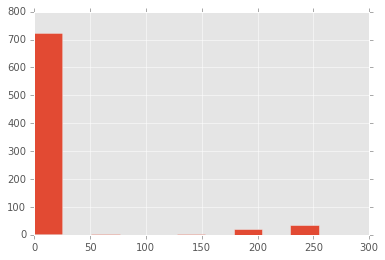

In [5]:
# plotting the distribution of greyscale values for a single image
plt.hist(images.iloc[i])

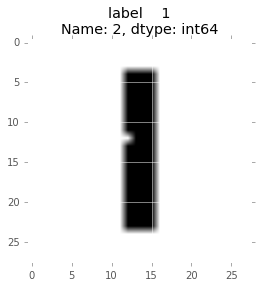

In [6]:
#since the values for pixels are in grey scale, 0-255, simplifying it to binary, black/white, would make the image more distinct
#thus easier for the classification

images[images>0]=1

img=images.iloc[i].as_matrix().reshape((28,28))
plt.imshow(img,cmap='binary')
plt.title(labels.iloc[i])

## KNN classification: first 10000 images

In [7]:
# KNN classification
# using the first 5000 images as training images to create the model

X = images
y = labels

model = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform')
model.fit(X,y)
print model.score(X,y)

0.9566


/Users/daweitan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [8]:
# Use the next 5000 images as test images to evaluate the model previously created

test_images = df.iloc[5000:10000,1:]
test_labels = df.iloc[5000:10000,:1]
test_images[test_images>0]=1

model.score(test_images,test_labels)

0.93440000000000001

## Further analysis using model created by first 5000 values

In [9]:
# Using the model to output predicted values and comparing it with original values
# check: 1 = correct, 0 = wrong

pred = model.predict(test_images)
check_df = test_labels
check_df['pred_labels'] = pred
check_df['check'] = 0

In [10]:
#creating a DataFrame with original label, predicted label and whether it matches

for x in range(5000,10000):
    a = check_df.ix[x][0]
    b = check_df.ix[x][1]
    if ((a - b) == 0):
        check_df.ix[x][2] = 1

In [11]:
check_df

,label,pred_labels,check
5000,8,8,1
5001,7,7,1
5002,2,2,1
5003,6,6,1
5004,3,9,0
...,...,...,...
9995,5,5,1
9996,0,0,1
9997,4,4,1
9998,7,7,1


In [12]:
print "total correctly predicted values:", check_df.check.sum()
print "accuracy: ", float(check_df.check.sum())/float(5000)

total correctly predicted values: 4672
accuracy:  0.9344


In [13]:
# Looking at the accuracy of the model for each number, 1-9.

cont_df = pd.DataFrame({'label': range(0,10)})
cont_df['total'] = 0
cont_df['count'] = 0
cont_df['percent'] = float(0)

In [14]:
# Creating a DataFrame with digit, amount of digits presented, amount of predicted digits, and accuracy percentage

for x in range(0,10):
    cont_df['total'].ix[x] = check_df[check_df.label == x]['check'].sum()
    cont_df['count'].ix[x] = check_df[check_df.label == x]['label'].count()
    cont_df['percent'].ix[x] = float(cont_df['total'].ix[x]) / float(cont_df['count'].ix[x])

/Users/daweitan/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
cont_df

,label,total,count,percent
0,0,490,497,0.985915
1,1,532,537,0.990689
2,2,468,500,0.936000
3,3,486,529,0.918715
4,4,421,490,0.859184
5,5,400,437,0.915332
6,6,475,487,0.975359
7,7,490,533,0.919325
8,8,420,473,0.887949
9,9,490,517,0.947776


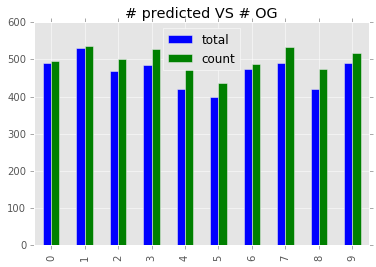

In [16]:
plot_df = cont_df[['total','count']]
plot_df.plot(kind = 'bar')
plt.title('# predicted VS # OG')

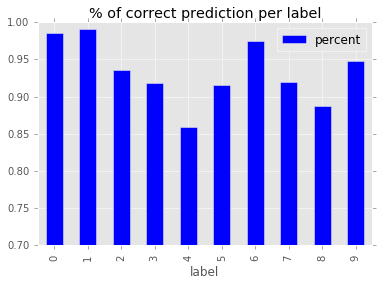

In [17]:
cont_df.plot(x = 'label',y = 'percent', kind = 'bar',ylim=0.7)
plt.title('% of correct prediction per label')

From the two graphs above, values 4 and 8 are the ones that has the lowest percentage of correct predictions, while 0 and 1 has the highest

# KNN classification: complete dataset

In [18]:
df = pd.read_csv(os.path.join('~/', 'downloads', 'train_digit.csv'))

train_df = df.sample(frac = .8, random_state = 0).sort()
test_df = df.drop(train_df.index)

train_images = train_df.iloc[0:,1:]
train_labels = train_df.iloc[0:,:1]
train_images[train_images>0]=1

test_images = test_df.iloc[0:,1:]
test_labels = test_df.iloc[0:,:1]
test_images[test_images>0]=1

/Users/daweitan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  app.launch_new_instance()


In [19]:
X = train_images
y = train_labels

allmodel = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform')
allmodel.fit(X,y)
print allmodel.score(X,y)

0.974553571429


/Users/daweitan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [20]:
pred = allmodel.predict(test_images)
check_df = test_labels
check_df['pred_labels'] = pred
check_df['check'] = 0


In [21]:
check_df = check_df.reset_index()

In [22]:
for x in range(len(check_df)):
    a = check_df.ix[x][1]
    b = check_df.ix[x][2]
    if ((a - b) == 0):
        check_df.ix[x][3] = 1

In [23]:
print "total correctly predicted values:", check_df.check.sum()
print "accuracy: ", float(check_df.check.sum())/float(check_df.pred_labels.count())

total correctly predicted values: 7839
accuracy:  0.933214285714


In [24]:
cont_df = pd.DataFrame({'label': range(0,10)})
cont_df['total'] = 0
cont_df['count'] = 0
cont_df['percent'] = float(0)

for x in range(0,10):
    cont_df['total'].ix[x] = check_df[check_df.label == x]['check'].sum()
    cont_df['count'].ix[x] = check_df[check_df.label == x]['label'].count()
    cont_df['percent'].ix[x] = float(cont_df['total'].ix[x]) / float(cont_df['count'].ix[x])

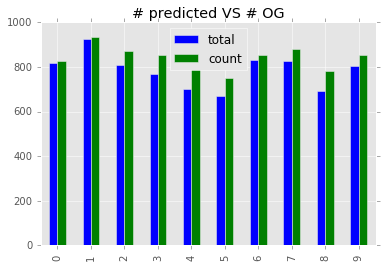

In [25]:
plot_df = cont_df[['total','count']]
plot_df.plot(kind = 'bar')
plt.title('# predicted VS # OG')

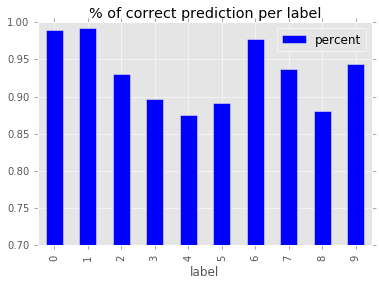

In [26]:
cont_df.plot(x = 'label',y = 'percent', kind = 'bar',ylim=0.7)
plt.title('% of correct prediction per label')

- similar to the previous model created using 5000 images, the values with largest miss classification are 4 and 8
- increasing data amount increased accuracy by 2%, meaning more data leads to higher accuracy, however it's not perfect

In [35]:
# Reading the test dataset from kaggle, running it through the model and outputting it to a csv file

test_digit_df = pd.read_csv(os.path.join('~/', 'downloads', 'test_digit.csv'))

pred = allmodel.predict(test_digit_df)

subm = pd.DataFrame({'ImageId':[x for x in range(1, len(test_digit_df) + 1)], 'Label':pred})
subm.head()
subm.to_csv('sub.csv')


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


- This version of the model scored 93% accuracy on kaggle's test dataset.

# Different approaches to increasing accuracy

##  altering the K value for KNN algorithm

In [27]:
#using the first 5000 images to speed up testing time

df = pd.read_csv(os.path.join('~/', 'downloads', 'train_digit.csv'))
images = df.iloc[0:5000,1:]
labels = df.iloc[0:5000,:1]
images[images>0]=1

In [28]:

X = images
y = labels

for k in range(1,15):
    model = neighbors.KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
    model.fit(X,y)
    print "k: ", k, "score: ", model.score(X,y)

k:  1 score:  

/Users/daweitan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/daweitan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


1.0
k:  2 score:  0.9678
k:  3 score:  

/Users/daweitan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/daweitan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9636
k:  4 score:  0.9596
k:  5 score:  

/Users/daweitan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/daweitan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9566
k:  6 score:  0.9508
k:  7 score:  

/Users/daweitan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/daweitan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.949
k:  8 score:  0.947
k:  9 score:  

/Users/daweitan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/daweitan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9434
k:  10 score:  0.9422
k:  11 score:  

/Users/daweitan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/daweitan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.941
k:  12 score:  0.9394
k:  13 score:  

/Users/daweitan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/daweitan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9358
k:  14 score:  0.9354


In [29]:
model = neighbors.KNeighborsClassifier(n_neighbors = 50, weights = 'uniform')
model.fit(X,y)
print "k: ", 50, "score: ", model.score(X,y)

k:  50 score:  0.899


/Users/daweitan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


As the K value increases, the score of the model slowly decreases. Thus the most suitable K value is 5. 

## Distance vs Uniform

### First 10000 images

In [70]:
df = pd.read_csv(os.path.join('~/', 'downloads', 'train_digit.csv'))
images = df.iloc[0:5000,1:]
labels = df.iloc[0:5000,:1]

In [71]:
images[images>0]=1
X = images
y = labels


model = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'distance')
model.fit(X,y)
print "score: ", model.score(X,y)

score:  1.0


/Users/daweitan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [72]:
test_images = df.iloc[5000:10000,1:]
test_labels = df.iloc[5000:10000,:1]
test_images[test_images>0]=1

print model.score(test_images,test_labels)

0.937


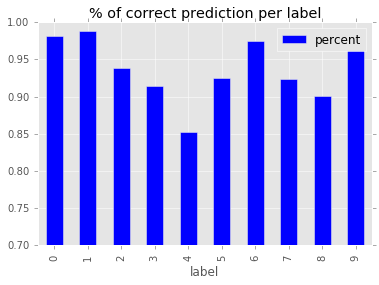

In [73]:
pred = model.predict(test_images)
check_df = test_labels
check_df['pred_labels'] = pred
check_df['check'] = 0

check_df = check_df.reset_index()

for x in range(len(check_df)):
    a = check_df.ix[x][1]
    b = check_df.ix[x][2]
    if ((a - b) == 0):
        check_df.ix[x][3] = 1
        
cont_df = pd.DataFrame({'label': range(0,10)})
cont_df['total'] = 0
cont_df['count'] = 0
cont_df['percent'] = float(0)

for x in range(0,10):
    cont_df['total'].ix[x] = check_df[check_df.label == x]['check'].sum()
    cont_df['count'].ix[x] = check_df[check_df.label == x]['label'].count()
    cont_df['percent'].ix[x] = float(cont_df['total'].ix[x]) / float(cont_df['count'].ix[x])
    
cont_df.plot(x = 'label',y = 'percent', kind = 'bar',ylim=0.7)
plt.title('% of correct prediction per label')

- similar to the "Uniform" model, digits 4 and 8 gave low accuracy, however digits 3 and 5 are  a lot higher

### Complete Dataset

In [66]:
df = pd.read_csv(os.path.join('~/', 'downloads', 'train_digit.csv'))
images = df.iloc[0:,1:]
labels = df.iloc[0:,:1]
all_images[all_images>0]=1

X = images
y = labels


distmodel = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'distance')
distmodel.fit(X,y)


unimodel = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform')
unimodel.fit(X,y)


print "distance score: ", distmodel.score(X,y)
print "uni score: ", unimodel.score(X,y)

/Users/daweitan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/daweitan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


distance score:  1.0
uni score:  0.979142857143


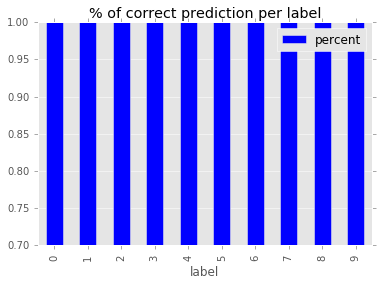

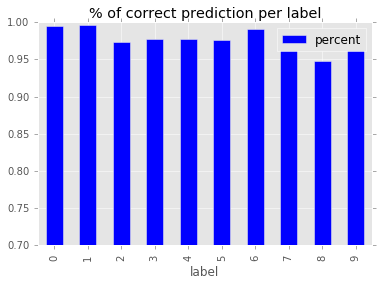

In [67]:
pred = distmodel.predict(X)
check_df = y
check_df['pred_labels'] = pred
check_df['check'] = 0

check_df = check_df.reset_index()

for x in range(len(check_df)):
    a = check_df.ix[x][1]
    b = check_df.ix[x][2]
    if ((a - b) == 0):
        check_df.ix[x][3] = 1
        
cont_df = pd.DataFrame({'label': range(0,10)})
cont_df['total'] = 0
cont_df['count'] = 0
cont_df['percent'] = float(0)

for x in range(0,10):
    cont_df['total'].ix[x] = check_df[check_df.label == x]['check'].sum()
    cont_df['count'].ix[x] = check_df[check_df.label == x]['label'].count()
    cont_df['percent'].ix[x] = float(cont_df['total'].ix[x]) / float(cont_df['count'].ix[x])
    
cont_df.plot(x = 'label',y = 'percent', kind = 'bar',ylim=0.7)
plt.title('% of correct prediction per label')

pred = unimodel.predict(X)
check_df = y
check_df['pred_labels'] = pred
check_df['check'] = 0

check_df = check_df.reset_index()

for x in range(len(check_df)):
    a = check_df.ix[x][1]
    b = check_df.ix[x][2]
    if ((a - b) == 0):
        check_df.ix[x][3] = 1
        
cont_df = pd.DataFrame({'label': range(0,10)})
cont_df['total'] = 0
cont_df['count'] = 0
cont_df['percent'] = float(0)

for x in range(0,10):
    cont_df['total'].ix[x] = check_df[check_df.label == x]['check'].sum()
    cont_df['count'].ix[x] = check_df[check_df.label == x]['label'].count()
    cont_df['percent'].ix[x] = float(cont_df['total'].ix[x]) / float(cont_df['count'].ix[x])
    
cont_df.plot(x = 'label',y = 'percent', kind = 'bar',ylim=0.7)
plt.title('% of correct prediction per label')

- Eventhough "Distance" model gave a score of 100, it doesn't translate to the model being 100% accurate. 
- One reason why "Distance" gave a higher score than "Uniform" is that the model gave closer neighbors higher "importance", instead of viewing all neighbors equally. This leads to higher accuracy for values like 7 and 8

In [69]:
test_digit_df = pd.read_csv(os.path.join('~/', 'downloads', 'test_digit.csv'))

pred = distmodel.predict(test_digit_df)

subm = pd.DataFrame({'ImageId':[x for x in range(1, len(test_digit_df) + 1)], 'Label':pred})
subm.head()
subm.to_csv('distsub1.csv')


- "Distnace" model scored 96% accuracy on kaggle.